<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Load the csv file

In [2]:
df=pd.read_csv('emp_attrition.csv')
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   33       Yes  Travel_Frequently  Research & Development                 3   
1   32       Yes      Travel_Rarely                   Sales                 4   
2   40       Yes      Travel_Rarely  Research & Development                 9   
3   42        No      Travel_Rarely  Research & Development                 7   
4   43        No  Travel_Frequently  Research & Development                27   

  EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
0  Life Sciences                        1    Male               3         1   
1        Medical                        4    Male               1         3   
2  Life Sciences                        4    Male               3         1   
3        Medical                        2  Female               4         2   
4  Life Sciences                        3  Female               3         3   

                  JobRole  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  \
0      Research Scientist                1           3348                   1   
1         Sales Executive                4          10400                   1   
2   Laboratory Technician                1           2018                   3   
3      Research Scientist                2           2372                   6   
4  Manufacturing Director                1          10820                   8   

  OverTime  PercentSalaryHike  PerformanceRating  YearsAtCompany  
0      Yes                 11                  3              10  
1       No                 11                  3              14  
2       No                 14                  3               5  
3      Yes                 16                  3               1  
4       No                 11                  3               8

In [3]:
df.shape

(1580, 18)

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

In [5]:
df.describe()

Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  \
count  1580.000000       1580.000000              1580.000000     1580.000000   
mean     34.339241          9.743671                 2.648734        2.660127   
std       8.828037          8.227881                 1.107876        0.755176   
min      18.000000          1.000000                 1.000000        1.000000   
25%      28.000000          2.000000                 2.000000        2.000000   
50%      33.000000          8.000000                 3.000000        3.000000   
75%      39.000000         16.000000                 4.000000        3.000000   
max      60.000000         29.000000                 4.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  \
count  1580.000000      1580.000000    1580.000000         1580.000000   
mean      1.705696         2.668354    4957.425949            2.470886   
std       0.800629         1.105636    3059.158533            2.232193   
min       1.000000         1.000000    1009.000000            0.000000   
25%       1.000000         2.000000    2571.750000            1.000000   
50%       2.000000         3.000000    4148.000000            1.000000   
75%       2.000000         4.000000    6397.000000            4.000000   
max       4.000000         4.000000   16555.000000            8.000000   

       PercentSalaryHike  PerformanceRating  YearsAtCompany  
count        1580.000000             1580.0     1580.000000  
mean           13.942405                3.0        5.206329  
std             2.425033                0.0        3.949229  
min            11.000000                3.0        0.000000  
25%            12.000000                3.0        2.000000  
50%            13.000000                3.0        5.000000  
75%            16.000000                3.0        8.000000  
max            19.000000                3.0       18.000000

In [6]:
df.drop('PerformanceRating', axis=1, inplace=True)

In [7]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR

C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_17700\2123583543.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=df.quantile(0.25)
C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_17700\2123583543.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=df.quantile(0.75)


In [8]:
df=df[~((df<lower) | (df>upper)).any(axis=1)]
df

C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_17700\722201940.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<lower) | (df>upper)).any(axis=1)]
C:\Users\Atharva Changade\AppData\Local\Temp\ipykernel_17700\722201940.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<lower) | (df>upper)).any(axis=1)]


Age Attrition     BusinessTravel              Department  \
0      33       Yes  Travel_Frequently  Research & Development   
1      32       Yes      Travel_Rarely                   Sales   
2      40       Yes      Travel_Rarely  Research & Development   
3      42        No      Travel_Rarely  Research & Development   
4      43        No  Travel_Frequently  Research & Development   
...   ...       ...                ...                     ...   
1574   30        No      Travel_Rarely  Research & Development   
1575   28       Yes         Non-Travel  Research & Development   
1577   30       Yes      Travel_Rarely                   Sales   
1578   31        No  Travel_Frequently  Research & Development   
1579   55       Yes      Travel_Rarely                   Sales   

      DistanceFromHome    EducationField  EnvironmentSatisfaction  Gender  \
0                    3     Life Sciences                        1    Male   
1                    4           Medical                        4    Male   
2                    9     Life Sciences                        4    Male   
3                    7           Medical                        2  Female   
4                   27     Life Sciences                        3  Female   
...                ...               ...                      ...     ...   
1574                 2           Medical                        2    Male   
1575                24  Technical Degree                        2    Male   
1577                 9           Medical                        2    Male   
1578                 1     Life Sciences                        3  Female   
1579                 2           Medical                        3    Male   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         1         Research Scientist                1   
1                  1         3            Sales Executive                4   
2                  3         1      Laboratory Technician                1   
3                  4         2         Research Scientist                2   
4                  3         3     Manufacturing Director                1   
...              ...       ...                        ...              ...   
1574               2         1      Laboratory Technician                4   
1575               2         3  Healthcare Representative                1   
1577               3         1       Sales Representative                4   
1578               3         2     Manufacturing Director                1   
1579               3         2            Sales Executive                4   

      MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
0              3348                   1      Yes                 11   
1             10400                   1       No                 11   
2              2018                   3       No                 14   
3              2372                   6      Yes                 16   
4             10820                   8       No                 11   
...             ...                 ...      ...                ...   
1574           2720                   0       No                 13   
1575           8722                   1       No                 12   
1577           1081                   1       No                 13   
1578           4148                   1       No                 12   
1579           5160                   4       No                 16   

      YearsAtCompany  
0                 10  
1                 14  
2                  5  
3                  1  
4                  8  
...              ...  
1574               5  
1575              10  
1577               1  
1578               4  
1579               9  

[1487 rows x 17 columns]

In [9]:
df=df.reset_index(drop=True)

In [10]:
df_categoric_features=df.select_dtypes(include=object)
df_categoric_features=pd.get_dummies(df_categoric_features, drop_first=True)
df_num=df.select_dtypes(exclude=object)
scalar=StandardScaler()
df_num=pd.DataFrame(scalar.fit_transform(df_num), columns=df_num.columns)
df_dummy=pd.concat([df_num,df_categoric_features],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
X_2=df_dummy[['MonthlyIncome','EnvironmentSatisfaction']]
y_2=df_dummy['Attrition_Yes']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=100)

In [12]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classification = DecisionTreeClassifier(random_state= 10)

decision_tree = decision_tree_classification.fit(X_train_2, y_train_2)

In [13]:
from sklearn.metrics import confusion_matrix
y_pred_2 = decision_tree.predict(X_test_2)
mat_2 = confusion_matrix(y_test_2, y_pred_2)
mat_2

array([[198,  51],
       [  8, 190]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
train_pred_2 = decision_tree.predict(X_train_2)
print(classification_report(y_train_2, train_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       566
           1       0.99      1.00      1.00       474

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



In [15]:
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       249
           1       0.79      0.96      0.87       198

    accuracy                           0.87       447
   macro avg       0.87      0.88      0.87       447
weighted avg       0.88      0.87      0.87       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
X_3=df_dummy.drop('Attrition_Yes', axis=1)
y_3=df_dummy['Attrition_Yes']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=100)

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classification = DecisionTreeClassifier(random_state= 10)

full_model = decision_tree_classification.fit(X_train_3, y_train_3)

In [18]:
from sklearn.metrics import confusion_matrix
y_pred_3 = full_model.predict(X_test_3)
mat_3 = confusion_matrix(y_test_3, y_pred_3)
mat_3

array([[197,  52],
       [  3, 195]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
train_pred_3 = full_model.predict(X_train_3)
print(classification_report(y_train_3, train_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       474

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



In [20]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       249
           1       0.79      0.98      0.88       198

    accuracy                           0.88       447
   macro avg       0.89      0.89      0.88       447
weighted avg       0.90      0.88      0.88       447



In [21]:
ft=full_model.feature_importances_
print(ft)
dataframe1=pd.DataFrame([ft,X_train_3.columns])
dataframe1

[0.1554067  0.10569179 0.04846181 0.04679614 0.03057045 0.03283511
 0.1663706  0.03568477 0.06168523 0.07635886 0.01792532 0.02422606
 0.00878671 0.         0.02003309 0.00774504 0.00339193 0.01382964
 0.0295619  0.02000583 0.00360185 0.00724954 0.         0.
 0.         0.01617809 0.         0.01380603 0.05379751]


0                 1                        2               3   \
0  0.155407          0.105692                 0.048462        0.046796   
1       Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement   

         4                5              6                   7   \
0   0.03057         0.032835       0.166371            0.035685   
1  JobLevel  JobSatisfaction  MonthlyIncome  NumCompaniesWorked   

                  8               9   ...           19  \
0           0.061685        0.076359  ...     0.020006   
1  PercentSalaryHike  YearsAtCompany  ...  Gender_Male   

                        20                             21               22  \
0                 0.003602                        0.00725              0.0   
1  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager   

                               23                         24  \
0                             0.0                        0.0   
1  JobRole_Manufacturing Director  JobRole_Research Director   

                           25                       26  \
0                    0.016178                      0.0   
1  JobRole_Research Scientist  JobRole_Sales Executive   

                             27            28  
0                      0.013806      0.053798  
1  JobRole_Sales Representative  OverTime_Yes  

[2 rows x 29 columns]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
def roc_plot(model,X,y,label):
    # K Nearest Neighbors
    y_pred = model.predict_proba(X)[:,1]
    
    # The roc_curve() returns the values for false positive rate, true positive and threshold
    # pass the actual target values and predicted probabilities to the function


    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc_score = round(roc_auc_score(y, y_pred),4)

    # plot the ROC curve
    plt.plot(fpr, tpr,label = label+'(AUC Score = %0.4f)' % auc_score)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # add plot and axes labels
    # set text size using 'fontsize
    plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    #add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    #'s' is the text
    # use round() to round-off the AUC score upto 4 digits
    plt.legend(loc = 'lower right')

    # plot the grid
    plt.grid(True)

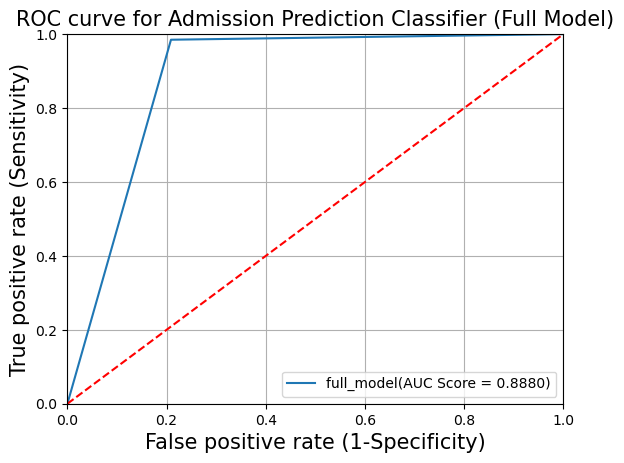

In [24]:
roc_plot(full_model,X_test_3,y_test_3,'full_model')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
TN=mat_3[0][0]
FP=mat_3[0][1]
FN=mat_3[1][0]
TP=mat_3[1][1]

In [26]:
specificity=TN/(TN+FP)
specificity

0.7911646586345381

In [27]:
sensitivity=TP/(TP+FN)
sensitivity

0.9848484848484849

In [28]:
misclassified_percent=(FP+FN)/(TN+TP+FP+FN)
misclassified_percent

0.12304250559284116

In [29]:
classified_percent=(TP+TN)/(TN+TP+FP+FN)
classified_percent

0.8769574944071589

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [30]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2,10),
                    'min_samples_split':range(2,10)}]

decision_tree_classification = DecisionTreeClassifier(random_state=10)

tree_grid = GridSearchCV(estimator=decision_tree_classification, param_grid=tuned_parameters, cv=5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_3, y_train_3)

print('Best parameters for decision tree classifier:', tree_grid_model.best_params_,'\n')

Best parameters for decision tree classifier: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2} 



In [31]:
full_model = DecisionTreeClassifier(**tree_grid_model.best_params_)
full_model = full_model.fit(X_train_3, y_train_3)

In [32]:
from sklearn import tree
plt.figure(figsize=(600,70))
tree.plot_tree(full_model, feature_names=list(X_train_3.columns), rounded=True, class_names=['0','1'], fontsize=45)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>7. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2,9),
                    'max_features':['sqrt','log2'],
                    'min_samples_split':range(2,10),
                    'min_samples_leaf':range(1,10),
                    'max_leaf_nodes':range(2,10)}]

decision_tree_classification = DecisionTreeClassifier(random_state=10)

tree_grid = GridSearchCV(estimator=decision_tree_classification, param_grid=tuned_parameters, cv=10)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_3, y_train_3)

print('Best parameters for decision tree classifier:', tree_grid_model.best_params_,'\n')

In [ ]:
dt_model = DecisionTreeClassifier(**tree_grid_model.best_params_)
dt_model = dt_model.fit(X_train_3, y_train_3)

In [ ]:
y_pred = dt_model.predict(X_train_3)
y_pred_test = dt_model.predict(X_test_3)

print(classification_report(y_train_3,y_pred))
print(classification_report(y_test_3,y_pred_test))

In [ ]:
test_pred = dt_model.predict(X_test_3)
print(classification_report(y_test_3, test_pred))

In [ ]:
roc_plot(dt_model,X_test_3,y_test_3,'full_model')